# Optimizing pandas time complexity example - Utkarsh Gaikwad

## Create a dummy data function

In [1]:
import pandas as pd
import numpy as np
def get_data(size=10_000):
    df = pd.DataFrame()
    df['age']=np.random.randint(5,100,size)
    df['time_in_bed']=np.random.randint(0,9,size)
    df['pct_sleep']=np.random.rand(size)
    df['favourite_food']=np.random.choice(['Pizza','Taco','Burger','Sandwich','Ice-Cream'],size)
    df['hated_food']=np.random.choice(['Eggs','Brocolli','Candy Corn','Mushroom','Spinach'],size)
    return df

In [2]:
df = get_data()
df.head()

,age,time_in_bed,pct_sleep,favourite_food,hated_food
0,85,0,0.344774,Pizza,Eggs
1,13,7,0.493678,Taco,Eggs
2,84,8,0.527491,Ice-Cream,Eggs
3,13,8,0.524587,Sandwich,Brocolli
4,6,7,0.111362,Ice-Cream,Brocolli


In [3]:
%%timeit
get_data()

4.99 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Problem Statement :
* if sleep is more than or equal to 6 hours AND percentage time sleep is greater than or equal to 50% then reward with favourite food.
* Otherwise give them Hated food
* if age>80 give favourite food regardless of above contition.

## Custom Function

In [4]:
def reward_calc(row):
    
    if row['age']>=80:
        return row['favourite_food']
    elif (row['time_in_bed']>=6) and (row['pct_sleep']>=0.5):
        return row['favourite_food']
    
    return row['hated_food']

## Method 1: Looping with custom function

In [5]:
%%timeit -r 7 -n 10
df = get_data()
for index, row in df.iterrows():
    df.loc[index,'reward'] = reward_calc(row)

1.85 s ± 4.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Method 2: Apply with custom function

In [6]:
%%timeit
df = get_data()
df['reward']= df.apply(reward_calc,axis=1)

148 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Method 3: Vectorize the results

In [7]:
%%timeit
df = get_data()
df['rewards'] = df['hated_food']
df.loc[((df['time_in_bed']>=6) & 
        (df['pct_sleep']>=0.5))|
        (df['age']>=80),'rewards'] = df['favourite_food']

7.41 ms ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
# Example usecase showing rewards
df = get_data()
df['rewards'] = df['hated_food']
df.loc[((df['time_in_bed']>=6) & 
        (df['pct_sleep']>=0.5))|
        (df['age']>=80),'rewards'] = df['favourite_food']
df.head()

,age,time_in_bed,pct_sleep,favourite_food,hated_food,rewards
0,71,5,0.921778,Pizza,Eggs,Eggs
1,61,2,0.654994,Sandwich,Mushroom,Mushroom
2,89,7,0.035329,Burger,Candy Corn,Burger
3,84,0,0.156084,Taco,Brocolli,Taco
4,75,3,0.595738,Ice-Cream,Brocolli,Brocolli


## Final Results Analysis

In [9]:
dct = {'type':['Looping','Apply','vectorized'],
       'average_time':[1850,148,7.41],
       'standard_deviation':[4.86,2.44,0.0705]}
df_analysis = pd.DataFrame(dct)
df_analysis

,type,average_time,standard_deviation
0,Looping,1850.00,4.8600
1,Apply,148.00,2.4400
2,vectorized,7.41,0.0705


<AxesSubplot: title={'center': 'Time to run reward calculation'}, xlabel='type'>

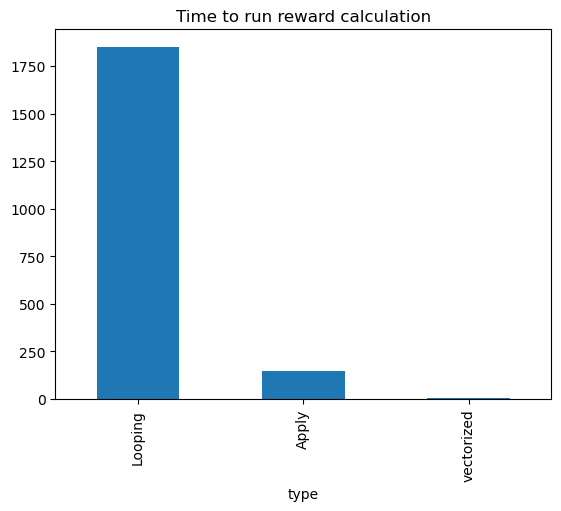

In [10]:
df_analysis.set_index('type')['average_time'].plot(kind='bar',title='Time to run reward calculation')